In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_rc = pd.read_csv('pd_patients_redcap.csv')

In [3]:
df_g = pd.read_csv('pd_patients_google.csv')

In [4]:
frames = [df_rc, df_g]
df_pd = pd.concat(frames, ignore_index=True)

In [6]:
df_gen = pd.read_csv('general_public.csv')

In [9]:
#Self-contained cell for converting data into numerical format for strongly agree questions
str2int_dict = {'Strongly Agree':5.0, 'Agree':4.0, 'Undecided': 3.0,'Disagree':2.0, 'Strongly Disagree':1.0}
def str2int(st):
    if ((type(st) == str) and (st.endswith('agree') or st.endswith('Agree') or st.endswith('decided'))):
        return str2int_dict[st]
    else:
        return st

In [10]:
for col in df_pd.columns:
    df_pd[col] = df_pd[col].apply(str2int)
    
for col in df_gen.columns:
    df_gen[col] = df_gen[col].apply(str2int)

In [12]:
# following question lists will contain three questions in sequence that can be compared
# put questions next to each other to make this obv. 
q_pd0 = "I would like to have the option to remove tremors from videos of myself."
q_gen0 = "The speaker should have the option to remove the tremors from the video."

q_pd1 = "I would like for viewers to have the option to remove tremors from a video of myself."
q_gen1 = "I would like to have the option to remove the tremors from the video."

q_pd2 = "I feel like my tremors cause others to perceive me as less competent. "
q_gen2 = "The speaker would appear more competent if the tremors were removed from the video"

q_pd_list = [q_pd0, q_pd1, q_pd2]
q_gen_list = [q_gen0, q_gen1, q_gen2]

In [14]:
# This is to generate a table of distributions (counts) for each answer for each question
# 'Strongly Agree':5, 'Agree':4, 'Undecided': 3,'Disagree':2, 'Strongly Disagree':1
# str2int_dict2 = {'Always':5, 'Often':4, 'Sometimes': 3,'Rarely':2, 'Never':1}
df_counts_pd = pd.DataFrame()
for q in q_pd_list:
    col_name = q
    df_counts_pd[col_name] = df_pd[col_name].value_counts() # applies function for every row in specified column
display(df_counts_pd)

df_counts_gen = pd.DataFrame()
for q in q_gen_list:
    col_name = q
    df_counts_gen[col_name] = df_gen[col_name].value_counts() # applies function for every row in specified column
display(df_counts_gen)

,I would like to have the option to remove tremors from videos of myself.,I would like for viewers to have the option to remove tremors from a video of myself.,I feel like my tremors cause others to perceive me as less competent.
3.0,63,59,30
4.0,57,61,71
2.0,22,16,31
5.0,19,18,19
1.0,9,16,14


,The speaker should have the option to remove the tremors from the video.,I would like to have the option to remove the tremors from the video.,The speaker would appear more competent if the tremors were removed from the video
4,44,35,30
5,30,10,12
3,19,17,17
2,12,35,27
1,3,11,22


In [20]:
# here we create a dataframe containing only disagree and agree sums
# begin with PD
df_agree_pd = df_counts_pd.loc[[4.0, 5.0],:].sum()
df_disagree_pd = df_counts_pd.loc[[1.0,2.0],:].sum()
df_neutral = df_counts_pd.loc[[3.0],:].sum()
df_AD_pd = pd.concat([df_agree_pd, df_disagree_pd], axis=1)
df_AD_pd.columns = ['Agree','Disagree']
print("Count for those who AGREED to the questions: ")
display(df_agree_pd)
print("Count for those who DISAGREED to the questions: ")
display(df_disagree_pd)
display(df_AD_pd)

# now for general public
df_agree_gen = df_counts_gen.loc[[4.0, 5.0],:].sum()
df_disagree_gen = df_counts_gen.loc[[1.0,2.0],:].sum()
df_neutral_gen = df_counts_gen.loc[[3.0],:].sum()
df_AD_gen = pd.concat([df_agree_gen, df_disagree_gen], axis=1)
df_AD_gen.columns = ['Agree','Disagree']
print("Count for those who AGREED to the questions: ")
display(df_agree_gen)
print("Count for those who DISAGREED to the questions: ")
display(df_disagree_gen)
display(df_AD_gen)

Count for those who AGREED to the questions: 


I would like to have the option to remove tremors from videos of myself.                 76
I would like for viewers to have the option to remove tremors from a video of myself.    79
I feel like my tremors cause others to perceive me as less competent.                    90
dtype: int64

Count for those who DISAGREED to the questions: 


I would like to have the option to remove tremors from videos of myself.                 31
I would like for viewers to have the option to remove tremors from a video of myself.    32
I feel like my tremors cause others to perceive me as less competent.                    45
dtype: int64

,Agree,Disagree
I would like to have the option to remove tremors from videos of myself.,76,31
I would like for viewers to have the option to remove tremors from a video of myself.,79,32
I feel like my tremors cause others to perceive me as less competent.,90,45


Count for those who AGREED to the questions: 


The speaker should have the option to remove the tremors from the video.              74
I would like to have the option to remove the tremors from the video.                 45
The speaker would appear more competent if the tremors were removed from the video    42
dtype: int64

Count for those who DISAGREED to the questions: 


The speaker should have the option to remove the tremors from the video.              15
I would like to have the option to remove the tremors from the video.                 46
The speaker would appear more competent if the tremors were removed from the video    49
dtype: int64

,Agree,Disagree
The speaker should have the option to remove the tremors from the video.,74,15
I would like to have the option to remove the tremors from the video.,45,46
The speaker would appear more competent if the tremors were removed from the video,42,49


In [23]:
# comparing questions with the z-portions test
display(df_AD_pd)
display(df_AD_gen)
for i in range(len(q_pd_list)):
    print("Comparing Questions:")
    print("PD Patients Question: ", q_pd_list[i])
    print("General Pub Question: ", q_gen_list[i])
    row_ID_pd = q_pd_list[i]
    num_agree_pd = df_AD_pd.loc[row_ID_pd,'Agree']
    num_disagree_pd = df_AD_pd.loc[row_ID_pd,'Disagree']
    row_ID_gen = q_gen_list[i]
    num_agree_gen = df_AD_gen.loc[row_ID_gen,'Agree']
    num_disagree_gen = df_AD_gen.loc[row_ID_gen,'Disagree']
    t, p = proportions_ztest(num_agree_pd+num_agree_gen, 
                             (num_agree_pd+num_agree_gen+num_disagree_pd+num_disagree_gen), 
                             value=.5) # Assume no difference 
    print("T: ", t, "P: ", p)
    print("\n==========================\n")

,Agree,Disagree
I would like to have the option to remove tremors from videos of myself.,76,31
I would like for viewers to have the option to remove tremors from a video of myself.,79,32
I feel like my tremors cause others to perceive me as less competent.,90,45


,Agree,Disagree
The speaker should have the option to remove the tremors from the video.,74,15
I would like to have the option to remove the tremors from the video.,45,46
The speaker would appear more competent if the tremors were removed from the video,42,49


Comparing Questions:
PD Patients Question:  I would like to have the option to remove tremors from videos of myself.
General Pub Question:  The speaker should have the option to remove the tremors from the video.
T:  8.764090104643996 P:  1.8829119360263505e-18


Comparing Questions:
PD Patients Question:  I would like for viewers to have the option to remove tremors from a video of myself.
General Pub Question:  I would like to have the option to remove the tremors from the video.
T:  3.323880309865165 P:  0.0008877428759607158


Comparing Questions:
PD Patients Question:  I feel like my tremors cause others to perceive me as less competent. 
General Pub Question:  The speaker would appear more competent if the tremors were removed from the video
T:  2.564229712167648 P:  0.010340508260585666




Comparing Questions:
PD Patients Question:  I would like to have the option to remove tremors from videos of myself.
General Pub Question:  The speaker should have the option to remove the tremors from the video.
PD:


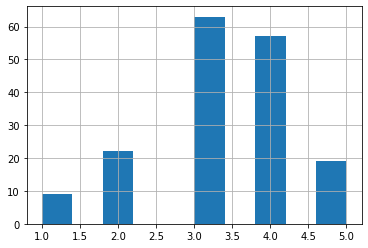

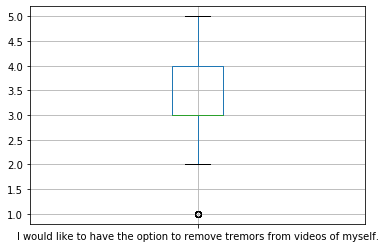

General Public: 


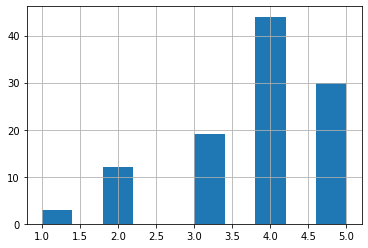

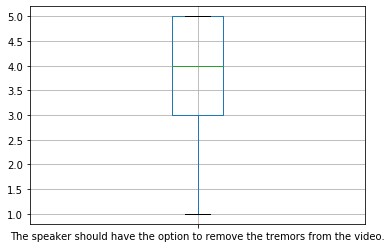

p-value =  0.0006501501012364577
u-value=  7470.0
T:  2.564229712167648 P:  0.0006501501012364577


Comparing Questions:
PD Patients Question:  I would like for viewers to have the option to remove tremors from a video of myself.
General Pub Question:  I would like to have the option to remove the tremors from the video.
PD:


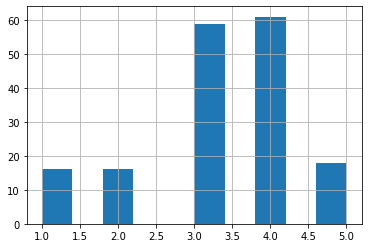

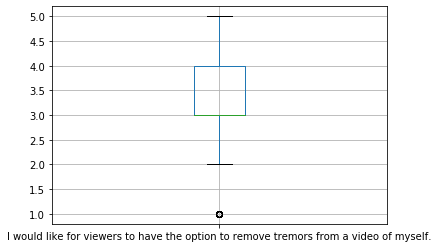

General Public: 


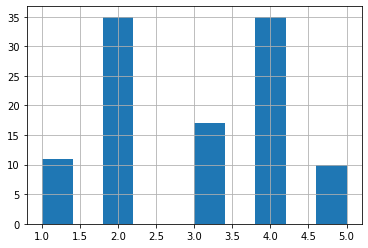

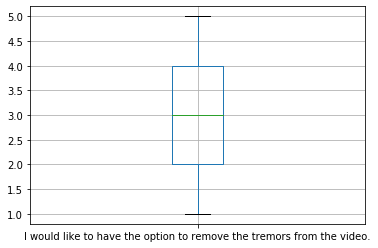

p-value =  0.00417986440628235
u-value=  7836.0
T:  2.564229712167648 P:  0.00417986440628235


Comparing Questions:
PD Patients Question:  I feel like my tremors cause others to perceive me as less competent. 
General Pub Question:  The speaker would appear more competent if the tremors were removed from the video
PD:


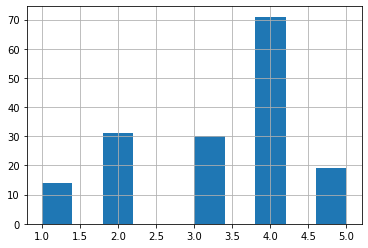

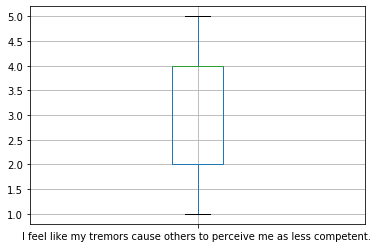

General Public: 


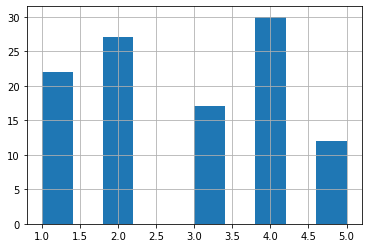

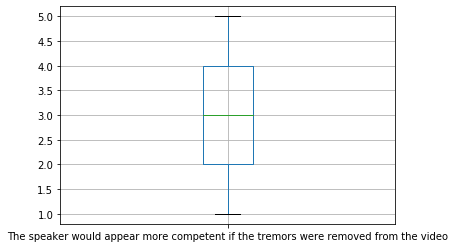

p-value =  0.00011756001881786474
u-value=  7151.5
T:  2.564229712167648 P:  0.00011756001881786474




In [26]:
for i in range(len(q_pd_list)):
    print("Comparing Questions:")
    print("PD Patients Question: ", q_pd_list[i])
    print("General Pub Question: ", q_gen_list[i])
    col_ID_pd = q_pd_list[i]
    col_ID_gen = q_gen_list[i]
    print("PD:")
    df_pd[col_ID_pd].hist()
    plt.show()
    df_pd.boxplot(col_ID_pd)
    plt.show()
    print("General Public: ")
    df_gen[col_ID_gen].hist()
    plt.show()
    df_gen.boxplot(col_ID_gen)
    plt.show()
    u,p = mannwhitneyu(df_pd[col_ID_pd], df_gen[col_ID_gen])
    print('p-value = ', p)
    print('u-value= ', u) 
    print("T: ", t, "P: ", p)
    print("\n==========================\n")

In [ ]:
'''
# questions to analyze
# from PD patients survey:
# Create an array of questions to analyze
*q0 = "I would like to have the option to remove tremors from videos of myself."
**q1 = "I would like for viewers to have the option to remove tremors from a video of myself."
q2 = "My tremors affect my level of confidence. " 
***q3 = "I feel like my tremors cause others to perceive me as less competent. "

q_list = [q0, q1, q2, q3]

# from general public survey 
q0 = "How often were you looking at the tremors?"
q1 = "I found the tremors to be distracting."
q2 = "I understood the content of the video."
q3 = "Removing the tremors from the video would help me understand the content better."
**q4 = "I would like to have the option to remove the tremors from the video."
*q5 = "The speaker should have the option to remove the tremors from the video."
q6 = "I perceive the speaker as competent"
***q7 = "The speaker would appear more competent if the tremors were removed from the video"

q_list = [q0, q1, q2, q3, q4, q5, q6, q7]
'''